# МАРКЕТИНГОВАЯ АНАЛИТИКА РАЗВЛЕКАТЕЛЬНОГО ПРИЛОЖЕНИЯ Procrastinate Pro+

Маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Задача — разобраться в причинах и помочь компании выйти в плюс.

**Описание данных**
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
* лог сервера с информацией о посещениях сайта - таблица visits_log_short;
* информация о заказах - таблица orders_log_short;
* информацию о расходах на рекламу - таблица costs_short.

**План работы**
Задача по выявлению причин убытков компании можно разделить на отдельные вопросы:
* откуда приходят пользователи и какими устройствами они пользуются;
* сколько стоит привлечение пользователей из различных рекламных каналов;
* сколько денег приносит каждый клиент;
* когда расходы на привлечение клиента окупаются;
* какие факторы мешают привлечению клиенто?



## Загрузите данные и подготовьте их к анализу

### Предобработка данных

#### Переименование стобцов и преобразование типов

In [1]:
import pandas as pd
import numpy as np
from datetime import date, datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
import math
import time
from datetime import datetime
from datetime import date, timedelta as td


In [2]:
try:visits, orders, costs = (pd.read_csv('/datasets/visits_info.csv'),
                             pd.read_csv('/datasets/orders_info.csv'),
                             pd.read_csv('/datasets/costs_info.csv'))
except: visits, orders, costs = (pd.read_csv('/https://code.s3.yandex.net/datasets/visits_info_short.csv'),
                                 pd.read_csv('https://code.s3.yandex.net/datasets/orders_info_short.csv'),
                                 pd.read_csv('https://code.s3.yandex.net/datasets/costs_info_short.csv'))

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,01.05.2019 02:36,01.05.2019 02:45
1,278965908054,United States,iPhone,organic,01.05.2019 04:46,01.05.2019 04:47
2,590706206550,United States,Mac,organic,01.05.2019 14:09,01.05.2019 15:32
3,326433527971,United States,Android,TipTop,01.05.2019 00:29,01.05.2019 00:54
4,349773784594,United States,Mac,organic,01.05.2019 03:33,01.05.2019 03:57


In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
visits['session_start'] = pd.to_datetime(visits['session_start'], format="%d.%m.%Y %H:%M")
visits['session_end'] = pd.to_datetime(visits['session_end'], format="%d.%m.%Y %H:%M")
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
visits['region'] = visits['region'].astype(str)
visits['device'] = visits['device'].astype(str)
visits['channel'] = visits['channel'].astype(str)

In [6]:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [8]:
orders['Event Dt'] = pd.to_datetime(orders['Event Dt'], format="%Y-%m-%d %H:%M:%S")
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [9]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [10]:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


In [11]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

#### Поиск дубликатов и заполнение пропусков

In [12]:
visits.duplicated().sum()

0

In [13]:
orders.duplicated().sum()

0

In [14]:
costs.duplicated().sum()

0

**Вывод:** Явные дубликаты не выявлены.

In [15]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [16]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [17]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [18]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

**Вывод:** Неявные дубликаты не выявлены.

Типы данных во всех, соответствуют нужным значениям. Дубликатов не выявлены.

Всего 150008 уникальных пользователей. Пользователи из 4-х стран - США, Англии, Франции, Германии. Приложением пользуются с 4-х платформ:  iPhone, Android, PC, Mac. При этом заказы оформляет только 8881 уникальных пользователей. 
Представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'.

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    #profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())


    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [20]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [21]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # что мы здесь делаем???
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 


In [23]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 


In [25]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [26]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

#### Определение профилей пользователей и минимальной/максимальной даты привлечения пользователей.

In [27]:
profiles = get_profiles(visits, orders, costs)
display(profiles.head(5))

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:00,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:00,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:00,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:00,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:00,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [28]:
profiles['dt'] = pd.to_datetime(profiles['dt'], format="%Y-%m-%d")

In [29]:
date_min = profiles['dt'].min().date()
date_max = profiles['dt'].max().date()
print(' Минимальная дата привлечения пользователей =', date_min,
      "\n",
      'Максимальная дата привлечения пользователей =', date_max)

 Минимальная дата привлечения пользователей = 2019-05-01 
 Максимальная дата привлечения пользователей = 2019-10-27


**Вывод:** Период привлечения пользователей от 01.05.2019 по 27.10.2019

#### Определение из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей.

In [30]:
top_country = pd.DataFrame()
top_country['users'] = profiles.groupby('region')['user_id'].count()
top_country['percent'] = ((top_country['users'] / profiles['region'].count()) * 100)
top_country.sort_values(by='percent', ascending=False).round(2)

,users,percent
region,,
United States,100002,66.66
UK,17575,11.72
France,17450,11.63
Germany,14981,9.99


**Вывод:** Больше всего пользователей приходят из США (66%), затем примерно одинаковое количество из Великобритании и Франции (Около 11%) и на последнем месте Германия (менее 10%).

In [31]:
payer_top_country = pd.DataFrame()
payer_top_country['users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
payer_top_country['percent'] = ((payer_top_country['users'] / profiles.query('payer == True')['region'].count()) * 100)
payer_top_country.sort_values(by='percent', ascending=False).round(2)

,users,percent
region,,
United States,6902,77.72
UK,700,7.88
France,663,7.47
Germany,616,6.94


**Вывод:** Больше всего платящих пользователей приходят из США (77%), затем примерно одинаковое количество из Великобритании и Франции (Около 7-8%) и на последнем месте Германия (менее 7%).

In [32]:
final_top_country = pd.DataFrame()
final_top_country['users'] = profiles.groupby('region')['user_id'].count()
final_top_country['users_percent'] = ((final_top_country['users'] / profiles['region'].count()) * 100)
final_top_country['payer_users'] = profiles.query('payer == True').groupby('region')['user_id'].count()
final_top_country['payer_percent'] = ((final_top_country['payer_users'] / final_top_country['users']) * 100)
final_top_country.sort_values(by='users_percent', ascending=False).round(2)

,users,users_percent,payer_users,payer_percent
region,,,,
United States,100002,66.66,6902,6.90
UK,17575,11.72,700,3.98
France,17450,11.63,663,3.80
Germany,14981,9.99,616,4.11


**Вывод:** Доля платящих пользователей из США около 7% (6902 из 100002), Великобритании и Франции около 4% (700 из 17575 и 663 из 17450), тогда как в Германии около 4% (616 из 14981).

#### Определение какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи.

In [33]:
top_device = pd.DataFrame()
top_device['users'] = profiles.groupby('device')['user_id'].count()
top_device['percent'] = ((top_device['users'] / profiles['device'].count()) * 100)
top_device.sort_values(by='percent', ascending=False).round(2)

,users,percent
device,,
iPhone,54479,36.32
Android,35032,23.35
PC,30455,20.30
Mac,30042,20.03


**Вывод:** Большинство пользователей мобильной версии приложения. Лидирует Iphone 36% на втором месте Android 23%. Стационарные системы на 3 и 4 месте PC и MAC по 20% соответственно. 

In [34]:
final_top_device = pd.DataFrame()
final_top_device['users'] = profiles.groupby('device')['user_id'].count()
final_top_device['users_percent'] = ((final_top_device['users'] / profiles['device'].count()) * 100)
final_top_device['payer_users'] = profiles.query('payer == True').groupby('device')['user_id'].count()
final_top_device['payer_percent'] = ((final_top_device['payer_users'] / final_top_device['users']) * 100)
final_top_device.sort_values(by='payer_percent', ascending=False).round(2)

,users,users_percent,payer_users,payer_percent
device,,,,
Mac,30042,20.03,1912,6.36
iPhone,54479,36.32,3382,6.21
Android,35032,23.35,2050,5.85
PC,30455,20.30,1537,5.05


**Вывод:** Традиционно пользователи техники Apple более склонны к покупкам цифровых продуктов. Мас и Iphone на 1 и 2 месте по количеству платящих пользователей (6.36% и 6.21% соответственно), тогда как Android и PC отстают (5.85% и 5% соответственно)  

#### Определение каналов, из которых пришло больше всего платящих пользователей.

In [35]:
top_chanel = pd.DataFrame()
top_chanel['users'] = profiles.groupby('channel')['user_id'].count()
top_chanel['percent'] = ((top_chanel['users'] / profiles['channel'].count()) * 100)

top_chanel['payer_users'] = profiles.query('payer == True').groupby('channel')['user_id'].count()
top_chanel['payer_percent'] = ((top_chanel['payer_users'] / profiles.query('payer == True')['channel'].count()) * 100)
top_chanel.sort_values(by='percent', ascending=False).round(2)

,users,percent,payer_users,payer_percent
channel,,,,
organic,56439,37.62,1160,13.06
FaceBoom,29144,19.43,3557,40.05
TipTop,19561,13.04,1878,21.15
OppleCreativeMedia,8605,5.74,233,2.62
LeapBob,8553,5.70,262,2.95
WahooNetBanner,8553,5.70,453,5.10
RocketSuperAds,4448,2.97,352,3.96
MediaTornado,4364,2.91,156,1.76
YRabbit,4312,2.87,165,1.86


In [36]:
top_chanel.sort_values(by='payer_percent', ascending=False).round(2)

,users,percent,payer_users,payer_percent
channel,,,,
FaceBoom,29144,19.43,3557,40.05
TipTop,19561,13.04,1878,21.15
organic,56439,37.62,1160,13.06
WahooNetBanner,8553,5.70,453,5.10
AdNonSense,3880,2.59,440,4.95
RocketSuperAds,4448,2.97,352,3.96
LeapBob,8553,5.70,262,2.95
OppleCreativeMedia,8605,5.74,233,2.62
lambdaMediaAds,2149,1.43,225,2.53


Больше всего пользователей пришли к пользованию сервисом самостоятельно (канал Orgznic 38%) или через каналы FaceBoom (19%) и TipTop (13%). Остальеые каналы в привлекли менее 5%.

В сигменте платящих пользователй ситуация схожая. Пользователи пришедшие с каналов FaceBoom	и TipTop (40% и 21% соответственно) произвели оплату.  

**Вывод:** Больше всего пользователей приходят из США (66%), затем примерно одинаковое количество из Великобритании и Франции (Около 11%) и на последнем месте Германия (менее 10%). Аналогичная ситуация и среди платящих пользователей. Больше всего из США (77%), затем примерно одинаковое количество из Великобритании и Франции (Около 7-8%) и на последнем месте Германия (менее 7%).

Аналогично выглядят данные по проценту платящих пользователей отдельно для кажлй страны: доля платящих пользователей из США около 7% (6902 из 100002), Великобритании и Франции около 4% (700 из 17575 и 663 из 17450), тогда как в Германии около 4% (616 из 14981).

Анализ устройств на которых используется приложение определил:

* большинство пользователей мобильной версии приложения. Лидирует Iphone 36% на втором месте Android 23%. Стационарные системы на 3 и 4 месте PC и MAC по 20% соответственно. 
* по количеству платящих пользователей лидируют Мас и Iphone на 1 и 2 месте по количеству платящих пользователей (6.36% и 6.21% соответственно), тогда как Android и PC отстают (5.85% и 5% соответственно)  

Анализ каналов привлечения пользователей определил:

* Больше всего пользователей пришли к пользованию сервисом самостоятельно (канал Orgznic 38%) или через каналы FaceBoom (19%) и TipTop (13%). Остальеые каналы в привлекли менее 5%.
* В сигменте платящих пользователй ситуация схожая. Пользователи пришедшие с каналов FaceBoom	и TipTop (40% и 21% соответственно) произвели оплату. 

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

#### Рассчет общей суммы расходов на маркетинг

In [37]:
print('Сумма расходов на маркетинг равна', costs['costs'].sum().round(1))

Сумма расходов на маркетинг равна 105497.3


#### Распределение трат по рекламным источникам

In [38]:
channel_costs = pd.DataFrame()
channel_costs['costs'] = costs.groupby('channel')['costs'].sum()
channel_costs['percent'] = ((channel_costs['costs'] / costs['costs'].sum()) * 100)
channel_costs.sort_values(by='percent', ascending=False).round(2)

,costs,percent
channel,,
TipTop,54751.30,51.90
FaceBoom,32445.60,30.75
WahooNetBanner,5151.00,4.88
AdNonSense,3911.25,3.71
OppleCreativeMedia,2151.25,2.04
RocketSuperAds,1833.00,1.74
LeapBob,1797.60,1.70
lambdaMediaAds,1557.60,1.48
MediaTornado,954.48,0.90


<AxesSubplot:title={'center':'Распределение трат по рекламным источникам'}, xlabel='Рекламный канал', ylabel='Затраты на канал, у.е.'>

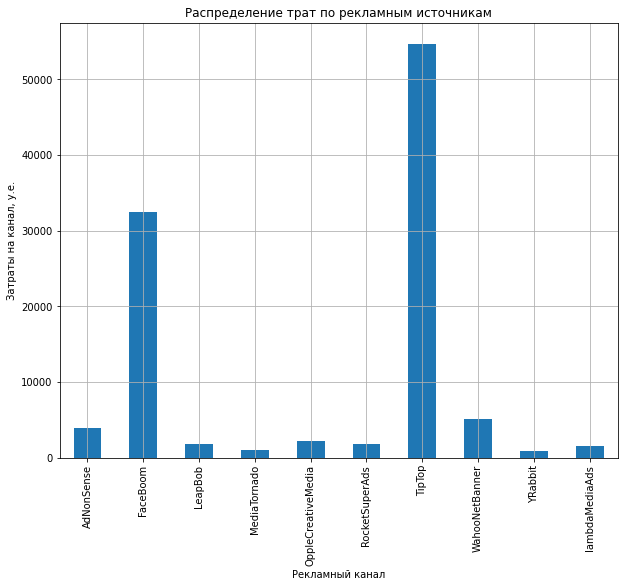

In [39]:
channel_costs['costs'].plot(
    kind = 'bar',
    grid = True, 
    title = 'Распределение трат по рекламным источникам',
    xlabel = 'Рекламный канал',
    ylabel ='Затраты на канал, у.е.',
    figsize=(10, 8)
)

**Вывод:** Всего на рекламу потрачено 105497.3 у.е. Из них основные траты ушли на каналы TipTop (52%) и FaceBoom (31%). Суммарно по двум каналам лидерам затраты составили на 82%, тогда как остальные 8 каналов потрачено всего 18%.

#### Динамика изменения расходов во времени по каждому источнику

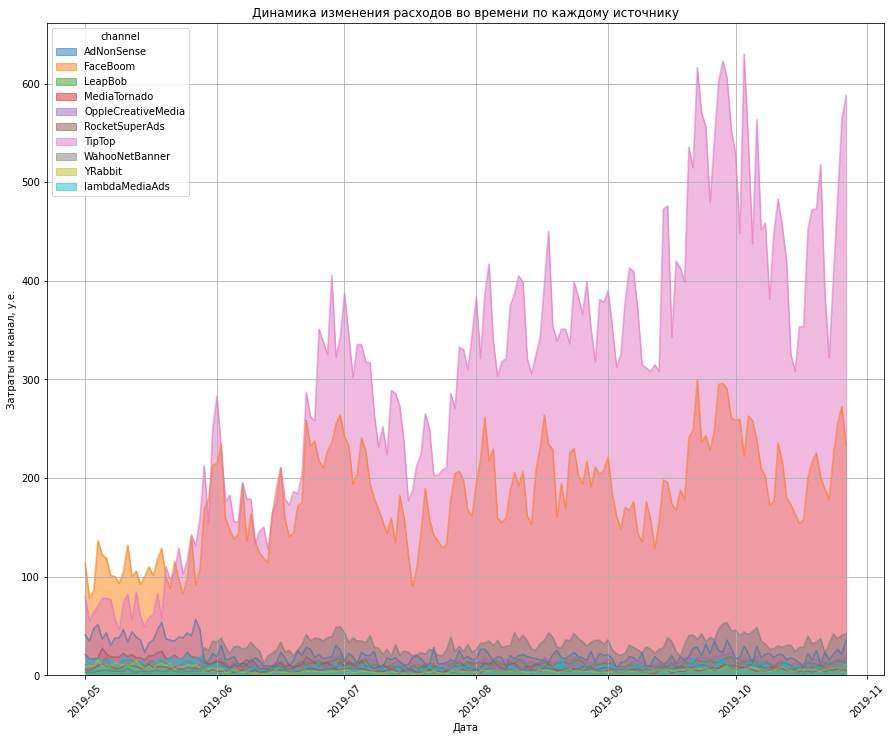

In [40]:
ax = costs.pivot_table(index='dt', 
                       columns='channel', 
                       values='costs', 
                       aggfunc='sum').plot.area(figsize=(15, 12),
                                           grid=True,
                                           rot=45, 
                                           title = 'Динамика изменения расходов во времени по каждому источнику',
                                           label='Канал',
                                           xlabel = 'Дата',
                                           ylabel ='Затраты на канал, у.е.',
                                           legend=True, 
                                            stacked=False) 

**Вывод:** График подтверждает, что затраты на каналы TipTop и FaceBoom значительно превосходят остальные каналы. Дополнительн видно, что если траты на канал FaceBoom стабильны за весь период, в свою очередь траты на TipTop значительно ростут. Особенно заметен рост в октябре 2019 года с 30 до 60 тысяч у.е.

#### Определение средней стоимости привлечение одного пользователя (CAC) из каждого источника. 

In [41]:
cac = profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False).round(2)
cac

channel
TipTop                2.80
FaceBoom              1.11
AdNonSense            1.01
lambdaMediaAds        0.72
WahooNetBanner        0.60
RocketSuperAds        0.41
OppleCreativeMedia    0.25
YRabbit               0.22
MediaTornado          0.22
LeapBob               0.21
organic               0.00
Name: acquisition_cost, dtype: float64

**Вывод** У канала TipTop самый дорогой трафик (2.8 у.е), каналы FaseBoom и AdnonSense примерно одинаковая стоимость (около 1 у.е.), самые дешевые каналы YRabbit (0.22 у.е.), MediaTornado (0.22 у.е.) и LeapBob (0.21 у.е.). Предсказуемо самые дешевый канал это бесплатные канал Organic.

Сумма расходов на маркетинг равна 105497.3 из них основные траты ушли на каналы TipTop (52%) и FaceBoom (31%). Суммарно по двум каналам лидерам затраты составили на 82%, тогда как остальные 8 каналов потрачено всего 18%.

Траты на канал FaceBoom стабильны за весь период, в свою очередь траты на TipTop значительно растут. Особенно заметен рост в октябре 2019 года с 30 до 60 тысяч у.е.

У канала TipTop самый дорогой трафик (2.8 у.е), каналы FaseBoom и AdnonSense примерно одинаковая стоимость (около 1 у.е.), самые дешевые каналы YRabbit (0.22 у.е.), MediaTornado (0.22 у.е.) и LeapBob (0.21 у.е.). Предсказуемо самые дешевый канал это бесплатные канал Organic.

На данном этапе выделяются два канала TipTop и FaceBoom и по количеству пользователей и по количеству платящих пользователей, вероятно это связано с значительно большим рекламным бюджетом. В свою очередь стоимость привлечения одного пользователя значительно выше остальных каналов. Необходим дальнейший анализ чтобы определить какие каналы самые эффективные.

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

#### Оценка окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

Чтобы органические пользователи не влияли на оценку окупаемости исключим из анализа.

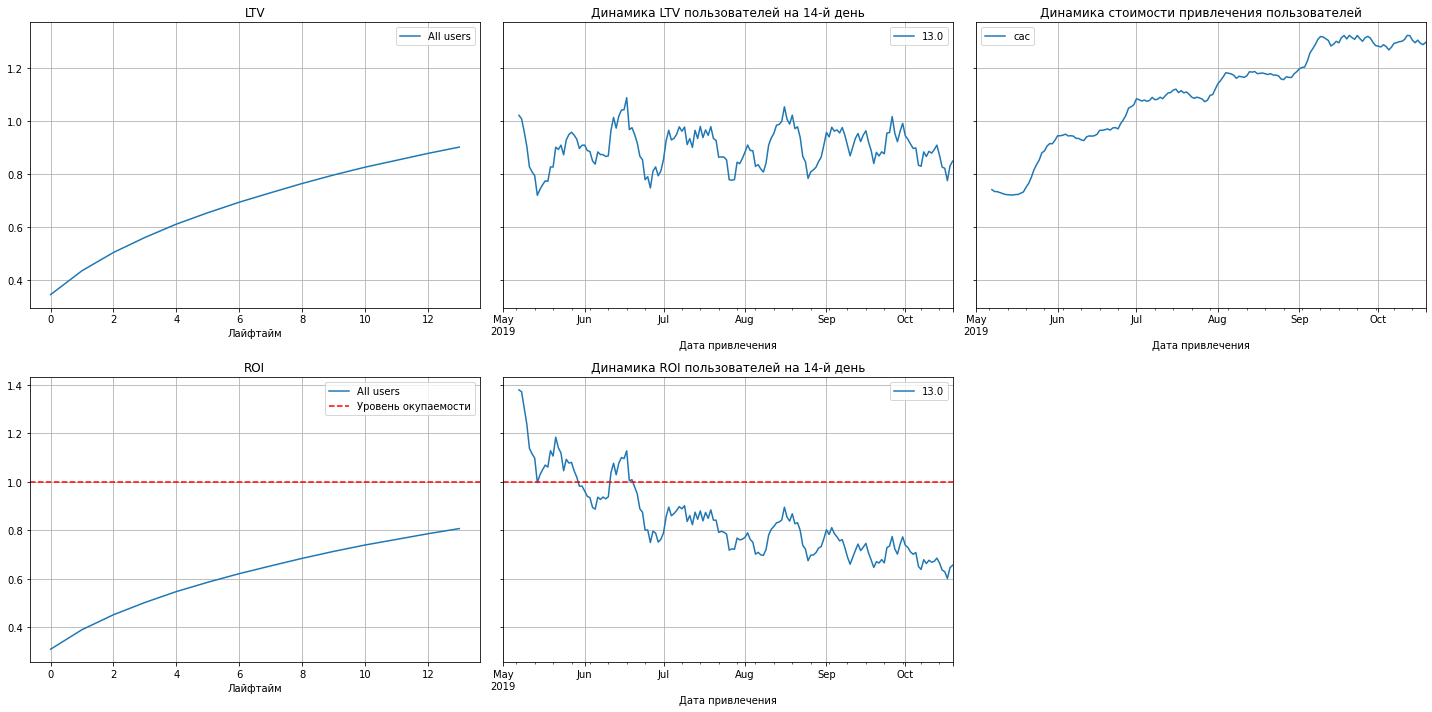

In [42]:
analiz_date = datetime(2019, 11, 1).date()  # момент анализа 
horizont = 14  # горизонт анализа 

# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, analiz_date, horizont
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizont) 

**Вывод:** 
* Исходя из графика ROI реклама не окупается за 2 недели;
* Исходя из графика LTV видна периодичность, что может объясняться сезонными факторвами, но в целом показатель достаточно стабилен. Следовательно проблема не в качестве пользователей;
* CAC стабильно ростет, рекламный бюджет увеличивается;
* Показатель ROI  стабильно снижается. С июля месяца стал меньше уровня окупаемости.


#### Оценка конверсии и удержания пользователей и динамики их изменения. 

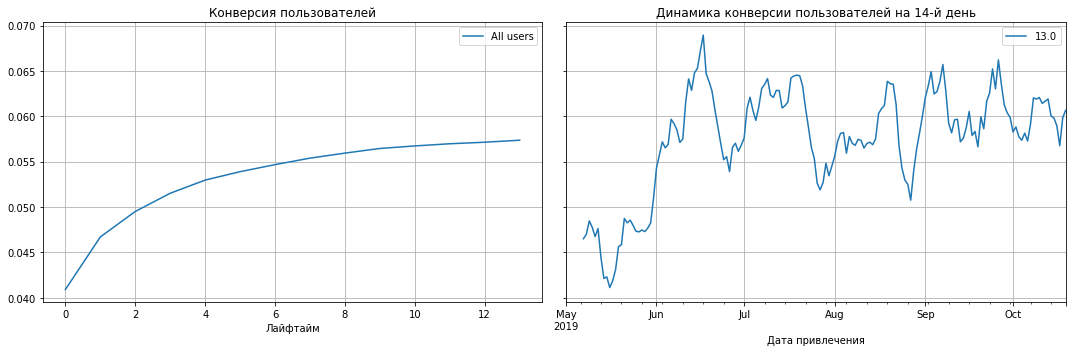

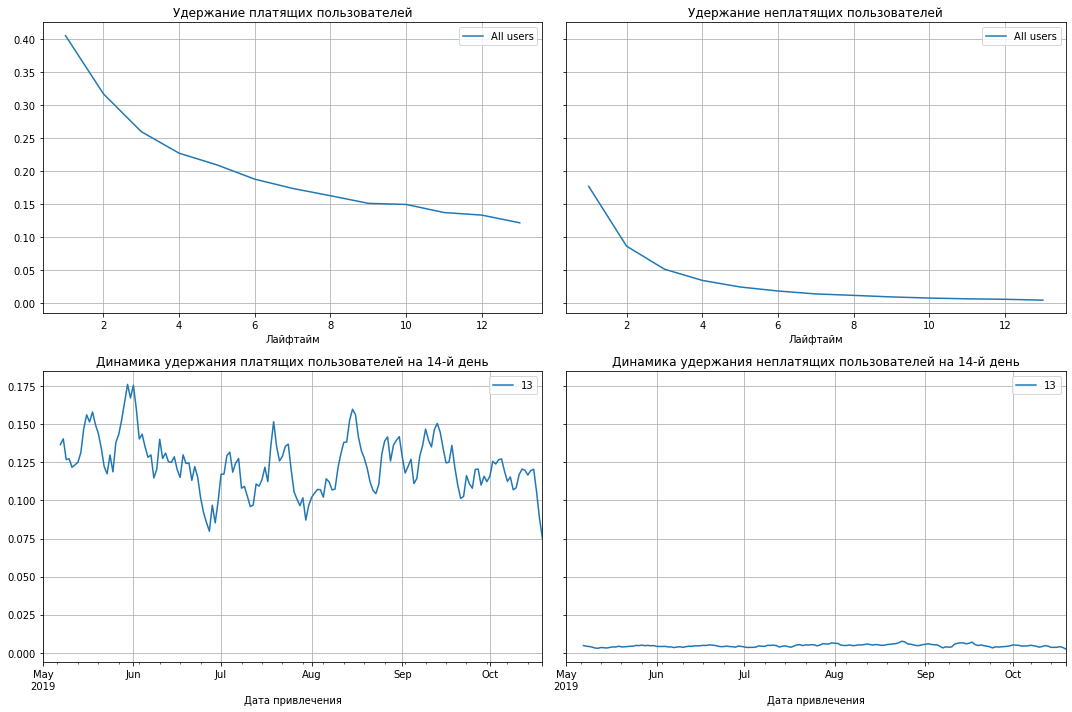

In [43]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, analiz_date, horizont
)

plot_conversion(conversion_grouped, conversion_history, horizont) 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, analiz_date, horizont
)

plot_retention(retention_grouped, retention_history, horizont) 



**Вывод:** Конверсия стабильно ростет, в динамике конверсии значимых провалов не наблюдается. Уровень удержания предсказуемо падает каук для платящих, так и для неплатящих пользователей.

#### Анализ окупаемости рекламы с разбивкой по устройствам.

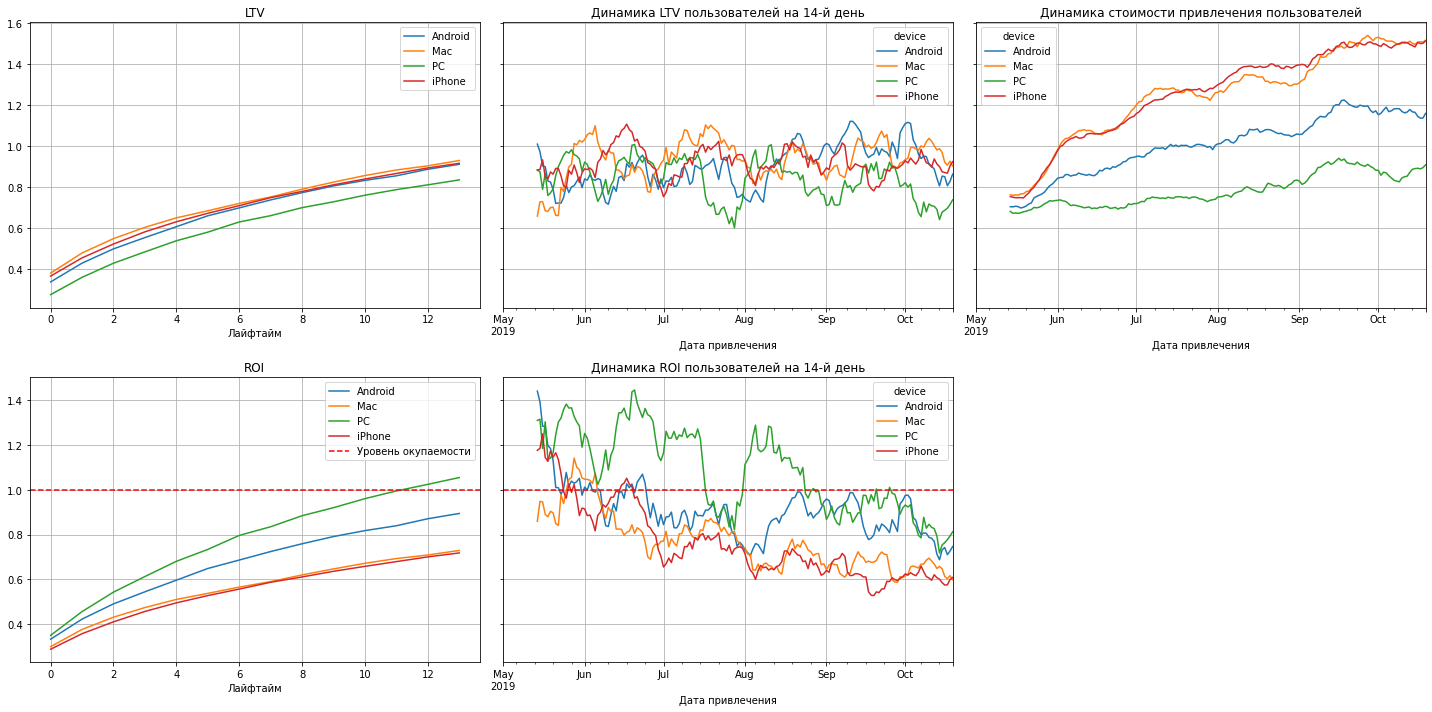

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, analiz_date, horizont, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizont, window=14
) 


**Вывод:** LTV для всех платформ примерно одинаков. Стоимость привлечения пользователей Mac и Iphone значительно привышает, PC и Android, тогда тогда как данные платформы не выходят на уровень окупаемости.  

#### Анализ окупаемости рекламы с разбивкой по странам

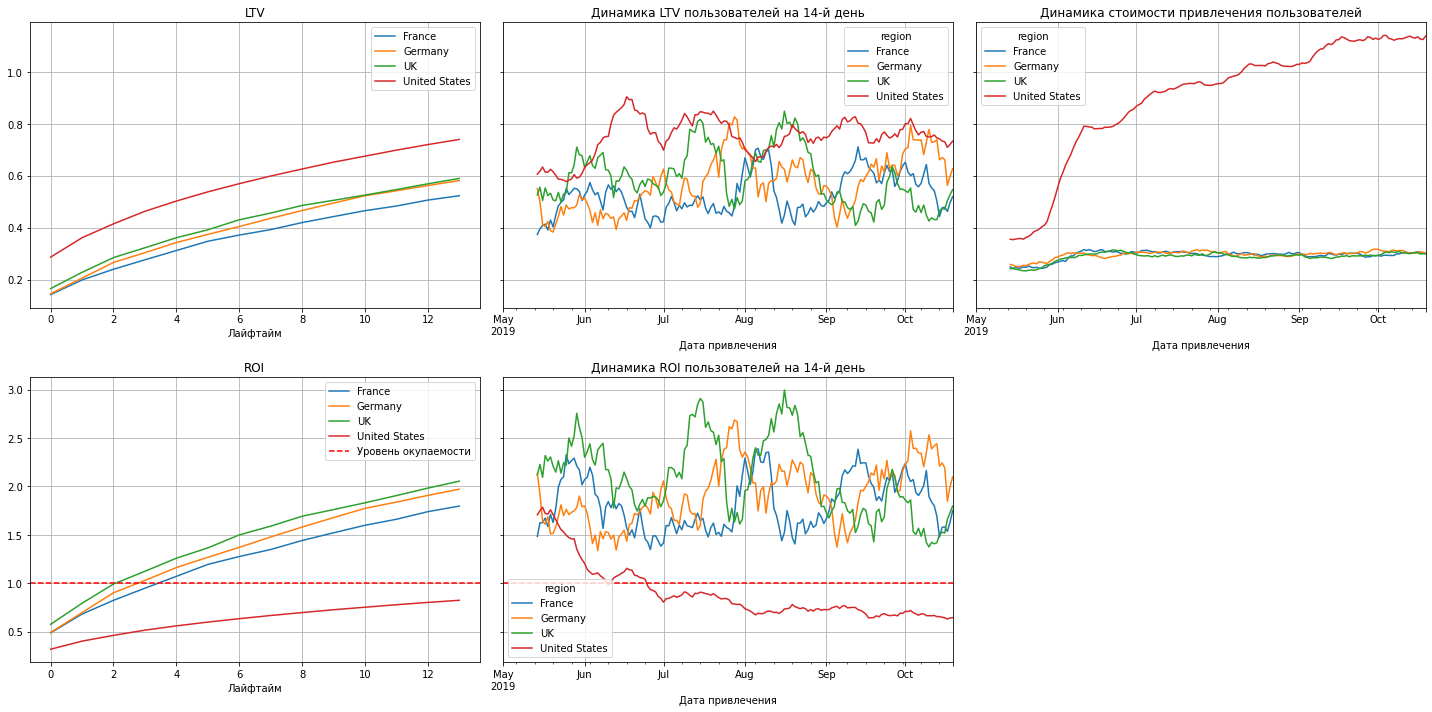

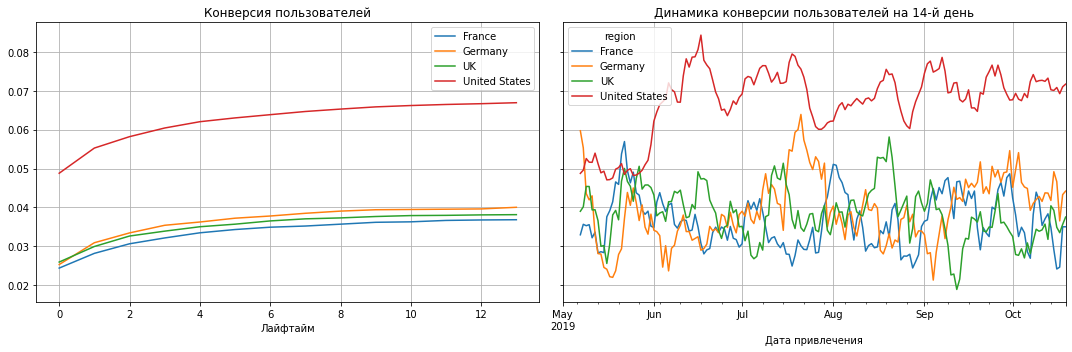

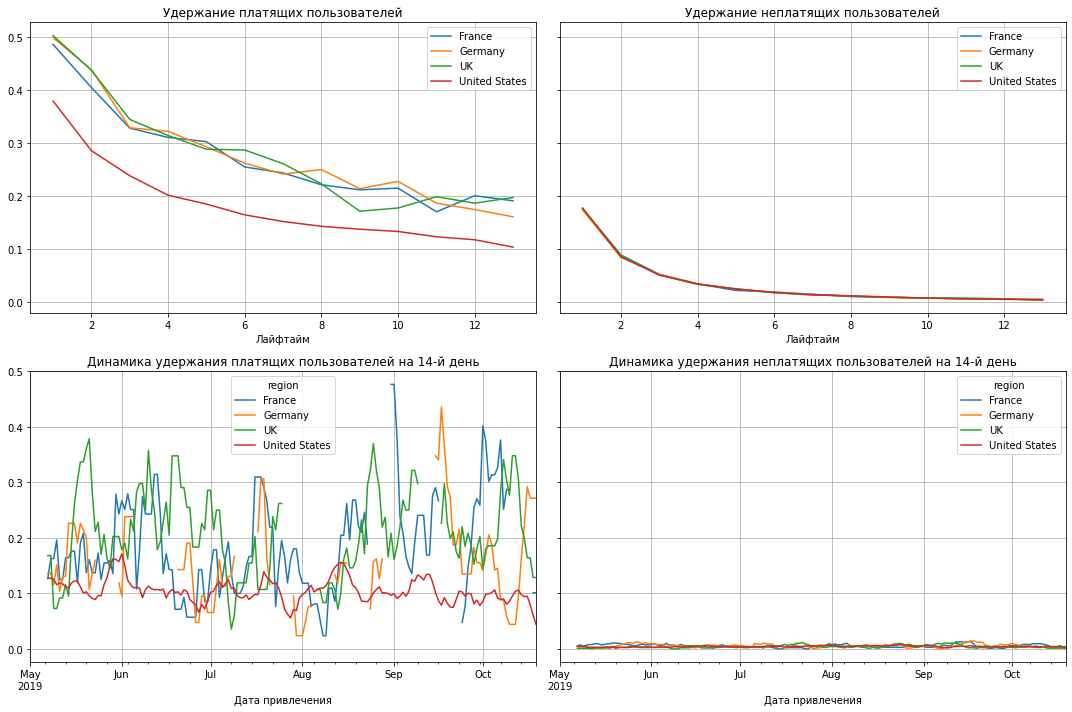

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, analiz_date, horizont, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizont, window=14
) 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, analiz_date, horizont, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizont) 

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, analiz_date, horizont, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizont) 

**Вывод:** 
* реклама окупается во всех странах, кроме США. При том, что это основной рынок для приложения;
* стоимость привлечения пользователей из США самая высокая и продолжает рости;
* LTV cтабилен для всех стран;
* конверсия пользователей Германии, Франции и Великобритании значительно ниже, но и их каличество также меньше чем пользователй из США; 
* пользователи из США значительно реже возвращаются к приложению.

#### Анализ окупаемости рекламы с разбивкой по рекламным каналам

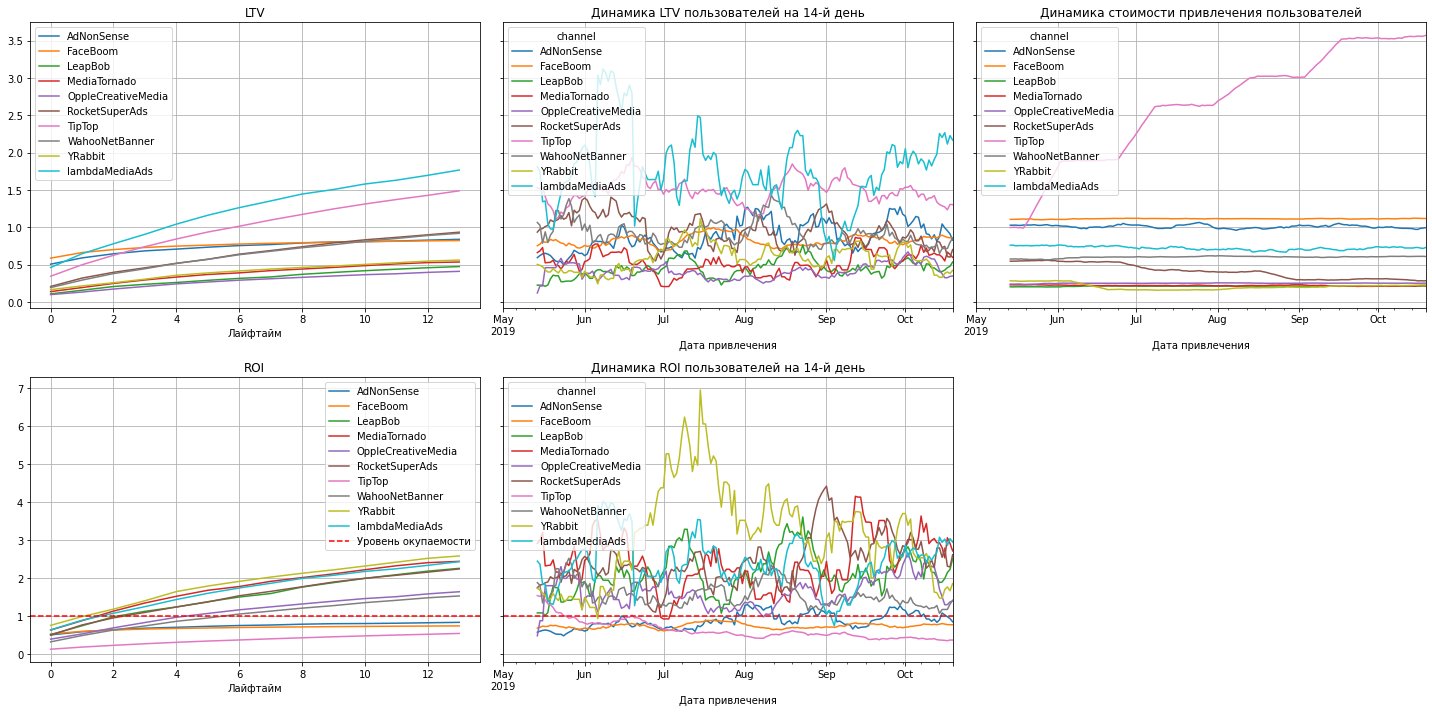

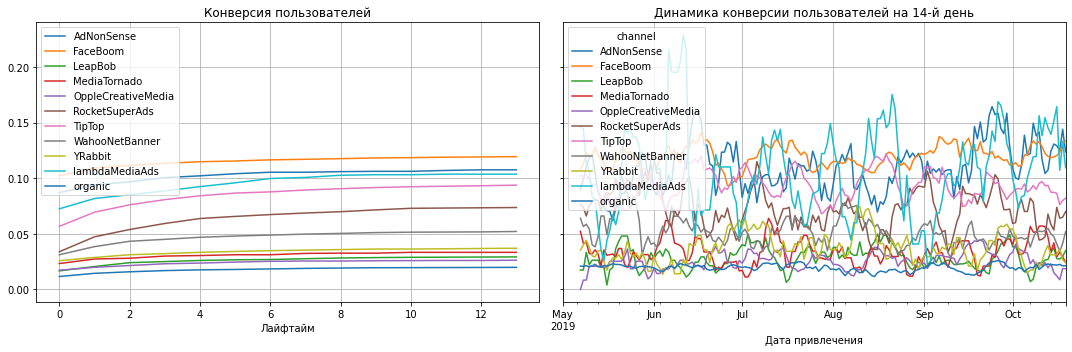

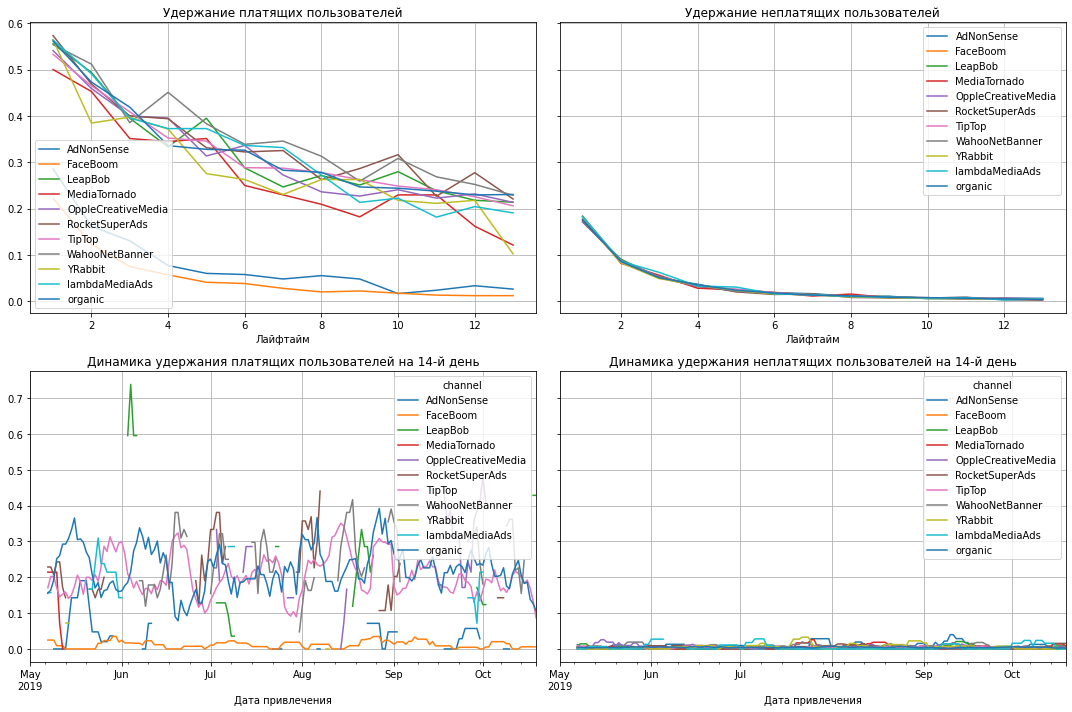

In [46]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles.query('channel != "organic"'), orders, analiz_date, horizont, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizont, window=14
) 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, analiz_date, horizont, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizont) 
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, analiz_date, horizont, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizont) 


**Вывод:** 
* наблюдается резкий рост стоимости привлечения пользователей из канала TipTop. Несмотрю на значительные затраты данные канал не окупился;
* пользователи из каналов LeapBop, FaceBoom, TipTop так же не окупаются;
* лучший результат показал канал YRabbit в июле;
* пользователи из каналов RocketSuperAds, MediaTornado, YRabbit плохо конвертируются; 
* пользователи из каналов FaceBoom и AdNonSense плохо удерживаются.

Уровень окупаемости рекламы составляет около 80%.  Отрицательно на окупаемость влияют пользователи Mac и iPhone и пользователи из США. Не эффективными оказались каналы LeapBop, FaceBoom, TipTop. Вероятно низкий уровень окупаемости связан снеравномерностью распределения рекламного бюджета, когда ставка делается на 1-2 канала в ущерб остальным. 

# Вывод

Для анализа использовалась информация о посещении сайта, информация о заказах, информацию о расходах на рекламу. В ходе предообработки произведено переименование столбцов и приведение типов данных. Пропуски и дубликаты не выявлены.

Всего 150008 уникальных пользователей. Пользователи из 4-х стран - США, Англии, Франции, Германии. Приложением пользуются с 4-х платформ:  iPhone, Android, PC, Mac. При этом заказы оформляет только 8881 уникальных пользователей. 
Представлены данные по закупкам в 10 каналах - 'FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit', 'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner', 'lambdaMediaAds'.

Больше всего пользователей приходят из США (66%), затем примерно одинаковое количество из Великобритании и Франции (Около 11%) и на последнем месте Германия (менее 10%). Аналогичная ситуация и среди платящих пользователей. Больше всего из США (77%), затем примерно одинаковое количество из Великобритании и Франции (Около 7-8%) и на последнем месте Германия (менее 7%).

Аналогично выглядят данные по проценту платящих пользователей отдельно для каждой страны: доля платящих пользователей из США около 7% (6902 из 100002), Великобритании и Франции около 4% (700 из 17575 и 663 из 17450), тогда как в Германии около 4% (616 из 14981).

Анализ устройств на которых используется приложение определил:

* большинство пользователей мобильной версии приложения. Лидирует Iphone 36% на втором месте Android 23%. Стационарные системы на 3 и 4 месте PC и MAC по 20% соответственно. 
* по количеству платящих пользователей лидируют Мас и Iphone на 1 и 2 месте по количеству платящих пользователей (6.36% и 6.21% соответственно), тогда как Android и PC отстают (5.85% и 5% соответственно)  

Анализ каналов привлечения пользователей определил:

* Больше всего пользователей пришли к пользованию сервисом самостоятельно (канал Orgznic 38%) или через каналы FaceBoom (19%) и TipTop (13%). Остальеые каналы в привлекли менее 5%.
* В сигменте платящих пользователй ситуация схожая. Пользователи пришедшие с каналов FaceBoom	и TipTop (40% и 21% соответственно) произвели оплату. 

Сумма расходов на маркетинг равна 105497.3 из них основные траты ушли на каналы TipTop (52%) и FaceBoom (31%). Суммарно по двум каналам лидерам затраты составили на 82%, тогда как остальные 8 каналов потрачено всего 18%.

Траты на канал FaceBoom стабильны за весь период, в свою очередь траты на TipTop значительно растут. Особенно заметен рост в октябре 2019 года с 30 до 60 тысяч у.е.

У канала TipTop самый дорогой трафик  стоимость привлечения пользователя (2.8 у.е.), каналы FaseBoom и AdnonSense примерно одинаковая стоимость (около 1 у.е.), самые дешевые каналы YRabbit (0.22 у.е.), MediaTornado (0.22 у.е.) и LeapBob (0.21 у.е.). Предсказуемо самые дешевый канал это бесплатные канал Organic.

На данном этапе выделяются два канала TipTop и FaceBoom и по количеству пользователей и по количеству платящих пользователей, вероятно это связано с значительно большим рекламным бюджетом. В свою очередь стоимость привлечения одного пользователя значительно выше остальных каналов.

Реклама не окупается за требуемые 2 недели. Уровень удержания под влиянием сезонности изменяется периодически. Рекламный бюджет ростет. Следовательно проблема кроется не в ухудшении качества пользователей.

Выявлено:
* стоимость привлечения канала, привлекшего больше всего пользователей в 3-10 раз больше, чем у остальных каналов 
* Реклама окупается во всех странах, кроме США. При том, что это основной рынок для приложения. При этом пользователи из США значительно реже возвращаются к приложению;
* наблюдается резкий рост стоимости привлечения пользователей из канала TipTop. Несмотрю на значительные затраты данные канал не окупился;
* пользователи из каналов LeapBop, FaceBoom, TipTop так же не окупаются;
* лучший результат показал канал YRabbit в июле;
* пользователи из каналов RocketSuperAds, MediaTornado, YRabbit плохо конвертируются; 
* пользователи из каналов FaceBoom и AdNonSense плохо удерживаются.


**Рекомендации для отдела маркетинга:**
* определить причину низкого уровня удержания в США, так как это основной рынок приложения;
* разработать специальные условия для разных платформ, чтобы привлечь пользователей Mac и Iphone;
* перераспределить рекламный бюджет между большим количеством каналов и не делать ставку на 1-2;
* определить причину эффективности канала YRabbit в июле возможно стоит увеличить их долю в рекламном бюджете.